# Exercice 1

### 1) Récupérer les données

In [1]:
import pandas as pd

df = pd.read_csv("http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt", sep='\t')
df = df.round({'Father' : 0, 'Mother' : 0, 'Height' : 0})
df['Father'] = df['Father'] * 2.54
df['Mother'] = df['Mother'] * 2.54
df['Height'] = df['Height'] * 2.54
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,198.12,170.18,M,185.42,4
1,1,198.12,170.18,F,175.26,4
2,1,198.12,170.18,F,175.26,4
3,1,198.12,170.18,F,175.26,4
4,2,193.04,167.64,M,187.96,4


In [57]:
number_of_observations, p = df.shape

898

### 2) Combien de données manquantes

In [3]:
print("Total Number of rows with NA values:", df.isnull().values.ravel().sum())

Total Number of rows with NA values: 0


### 3) Afficher sur un même graphique un estimateur de la densité

In [4]:
grouped_by_family_df = df.groupby(df['Family'])
father_df = grouped_by_family_df.first()['Father']
mother_df = grouped_by_family_df.first()['Mother']

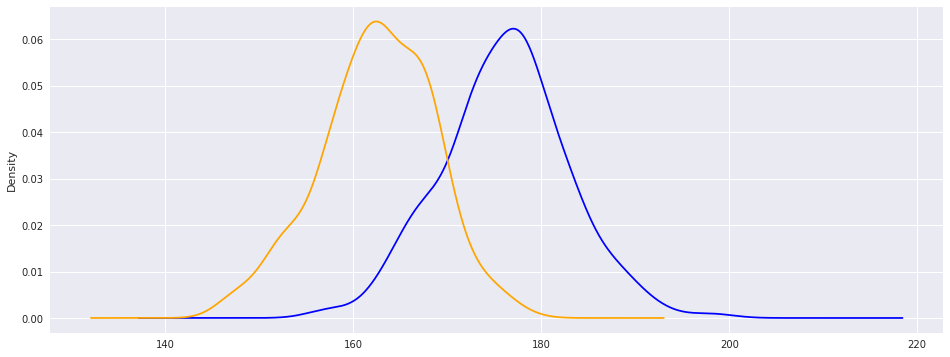

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(16,6))

father_df.plot.kde(ax=ax, color='blue')
mother_df.plot.kde(ax=ax, color='orange')


### 4) Afficher la taille du père en fonction de la taille de la mère

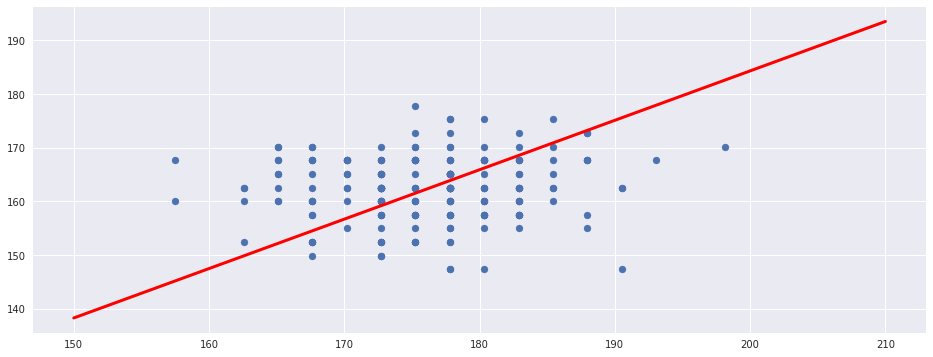

In [12]:
from sklearn import linear_model
import numpy as np

skl_linmod_no_inter = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_no_inter.fit(father_df.values.reshape(len(father_df.values), 1), mother_df.values)
xs = np.linspace(150.0, 210.0, num=2)
X_to_predict = xs.reshape(len(xs), 1)

# plotting
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(father_df, mother_df)
ax.plot(X_to_predict, skl_linmod_no_inter.predict(X_to_predict), linewidth=3, label="OLS-sklearn-no-intercept", color='red')

### 5) Afficher un histogramme du nombre d'enfants par famille

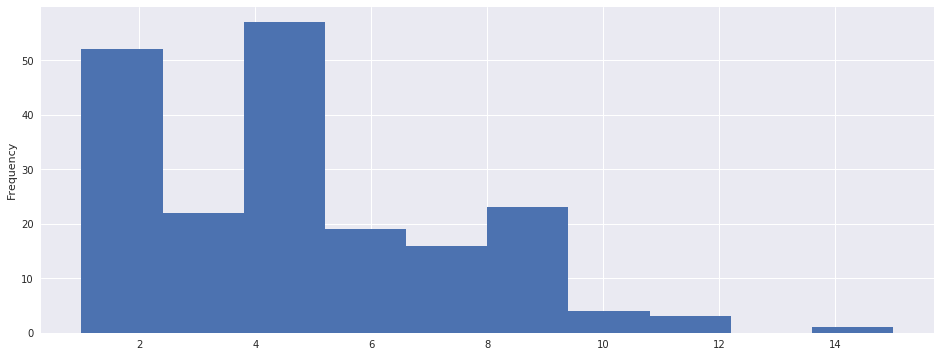

In [13]:
number_of_children_by_family = grouped_by_family_df['Kids'].first()

# plot
fig, ax = plt.subplots(figsize=(16,6))
number_of_children_by_family.plot.hist(ax=ax)

### 6) Colonne supplémentaire MidParents

In [21]:
df['MidParents'] = (df['Father'] + 1.08 * df['Mother']) / 2

### 7) Estimation de Teta0 et Teta1

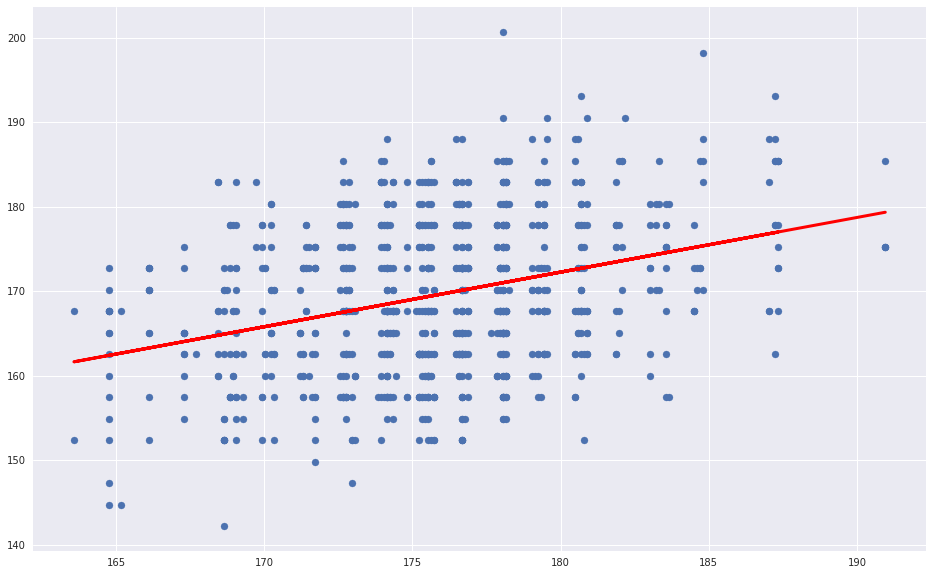

In [51]:
x = df['MidParents']
X = x.values.reshape(len(x), 1)
y = df['Height']

skl_linmod_inter = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_inter.fit(X, y)

# plotting
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(X, y)
ax.plot(X, skl_linmod_inter.predict(X), linewidth=3, label="OLS-sklearn-no-intercept", color='red')

In [88]:
teta0 = skl_linmod_inter.intercept_
teta1 = skl_linmod_inter.coef_[0]

ybar = y.mean()
xbar = x.mean()

def check_teta0():
    teta0_calc = ybar - xbar * teta1
    print("calculated teta0 = " + str(teta0_calc))
    print("scikitlearn teta0 = " + str(teta0))
    if (np.isclose(teta0, teta0_calc)):
        print("Teta0 has been estimated correctly")
    else:
        print("Teta0 has not been estimated correctly")
        
def check_teta1():
    teta1_calc = ((x - xbar) * (y - ybar)).sum() / ((x - xbar) ** 2).sum()
    print("estimated teta1 = " + str(teta1_calc))
    print("scikitlearn teta1 = " + str(teta1))
    if (np.isclose(teta1, teta1_calc)):
        print("Teta1 has been estimated correctly")
    else:
        print("Teta1 has not been estimated correctly")
        
check_teta0()
print()
check_teta1()

calculated teta0 = 55.9911377334
scikitlearn teta0 = 55.9911377334
Teta0 has been estimated correctly

estimated teta1 = 0.645969468101
scikitlearn teta1 = 0.645969468101
Teta1 has been estimated correctly


### 8) Calculer et visualiser les valeurs prédites vs les observations

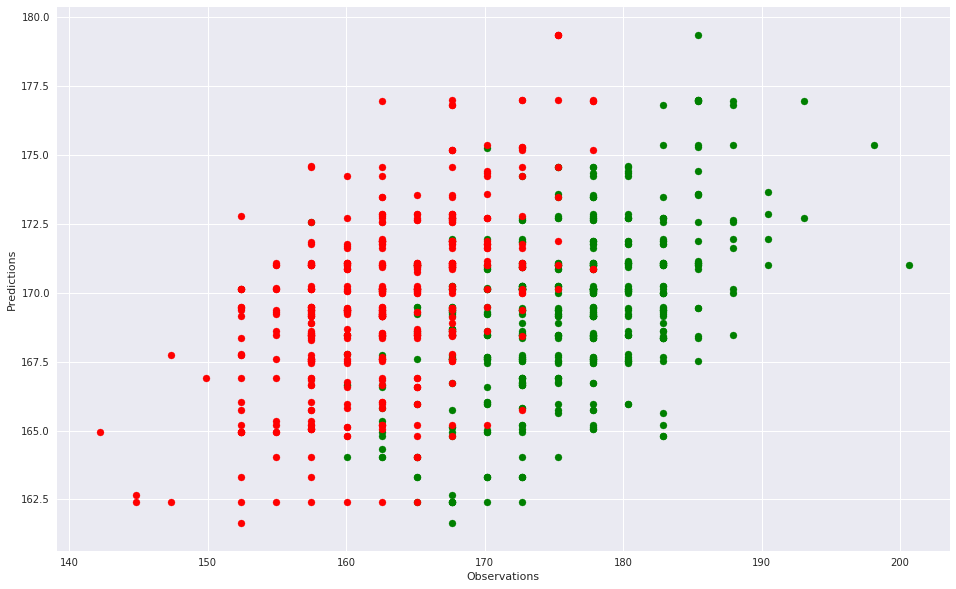

In [99]:
male_data = df[df['Gender'] == 'M']
female_data = df[df['Gender'] == 'F']
x_male = male_data['MidParents']
x_female = female_data['MidParents']
y_male = male_data['Height']
y_female = female_data['Height']

y_male_estim = teta0 + teta1 * x_male
y_female_estim = teta0 + teta1 * x_female

fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Observations')
ax.set_ylabel('Predictions')
ax.scatter(y_male, y_male_estim, color='green')
ax.scatter(y_female, y_female_estim, color='red')

### 9) Estimateur de la densité des résidus

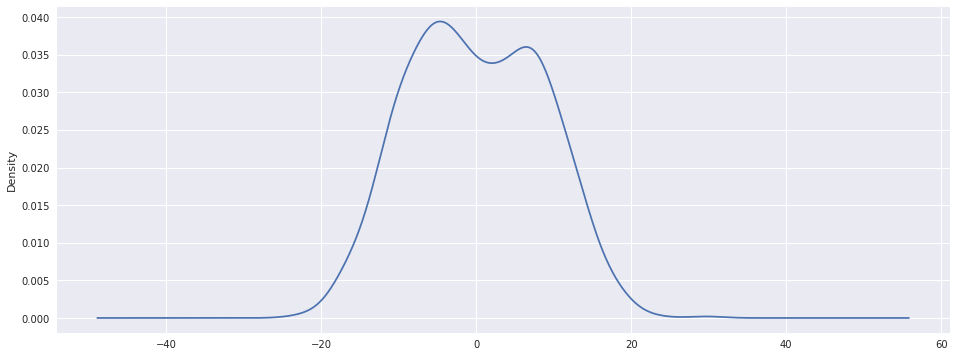

In [105]:
y_estim = teta0 + teta1 * x
r = y - y_estim

fig, ax = plt.subplots(figsize=(16,6))
r.plot.kde(ax=ax)

###### L'hypothèse de normalité est-elle crédible selon vous ?

- On constate que la distribution des résidus se concentre en deux points particuliers. La densité ne suit pas une loi normale. L'hypothèse de normalité n'est donc pas respectée.

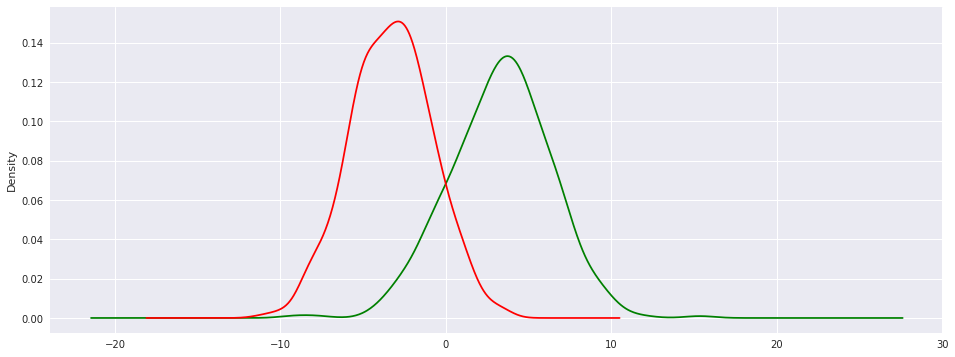

In [112]:
alpha_male = len(y_male) / number_of_observations
alpha_female = len(y_female) / number_of_observations
r_male = alpha_male * (y_male - y_male_estim)
r_female = alpha_female * (y_female - y_female_estim)

fig, ax = plt.subplots(figsize=(16,6))
r_male.plot.kde(ax=ax, color='green')
r_female.plot.kde(ax=ax, color='red')

L'hypothèse de normalité se confirme lorsque l'on sépare notre jeux de données en deux parties (une pour les hommes et une pour les femmes).

### 10) Régression de X sur Y

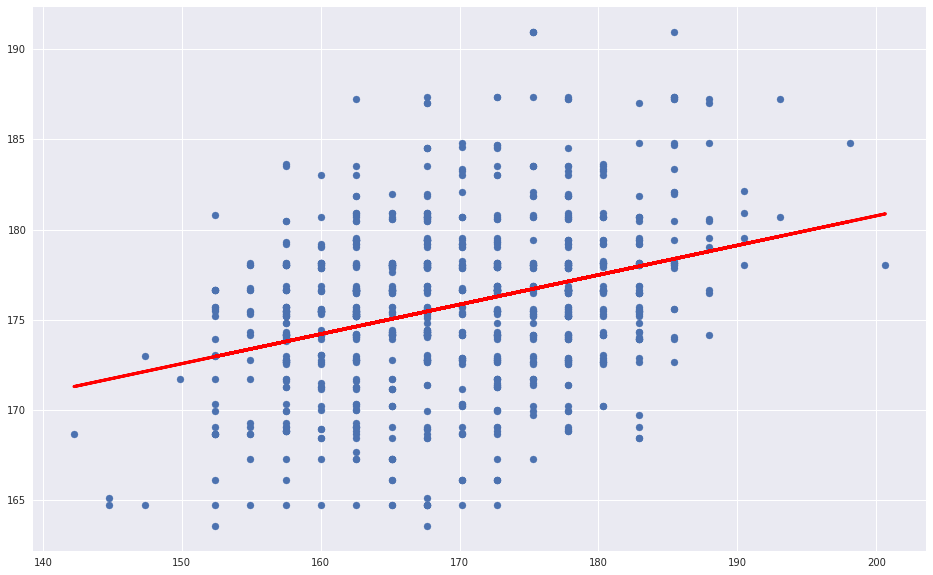

In [114]:
x = df['MidParents']
y = df['Height']
Y = y.values.reshape(len(y), 1)

skl_linmod_inter2 = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_inter2.fit(Y, x)

# plotting
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(Y, x)
ax.plot(Y, skl_linmod_inter2.predict(Y), linewidth=3, label="OLS-sklearn-no-intercept", color='red')

In [121]:
alpha0 = skl_linmod_inter2.intercept_
alpha1 = skl_linmod_inter2.coef_[0]

ybar = y.mean()
xbar = x.mean()

def check_alpha0():
    alpha0_calc = xbar + ((ybar / xbar) * (np.var(x) / np.var(y)) * (teta0 - ybar))
    print("calculated alpha0 = " + str(alpha0_calc))
    print("scikitlearn alpha0 = " + str(alpha0))
    if (np.isclose(alpha0, alpha0_calc)):
        print("alpha0 has been estimated correctly")
    else:
        print("alpha0 has not been estimated correctly")
        
def check_alpha1():
    alpha1_calc = (np.var(x) / np.var(y)) * teta1
    print("estimated alpha1 = " + str(alpha1_calc))
    print("scikitlearn alpha1 = " + str(alpha1))
    if (np.isclose(alpha1, alpha1_calc)):
        print("alpha1 has been estimated correctly")
    else:
        print("alpha1 has not been estimated correctly")
        
check_alpha0()
print()
check_alpha1()

calculated alpha0 = 147.982253443
scikitlearn alpha0 = 147.982253443
alpha0 has been estimated correctly

estimated alpha1 = 0.16394609065
scikitlearn alpha1 = 0.16394609065
alpha1 has been estimated correctly


# Exercice2